In [1]:
#!pip install pandas
#!pip install plotly
import pandas as pd
import plotly.express as px
import datetime

# Краткая навигация

1. [Распаковка данных](#unpack)
2. [Разбиение реестра на столбцы](#split)
3. [Анализ данных](#an)
4. [Гипотеза №1](#hyp1)
5. [Гипотеза №2](#hyp2)

# Важное замечание
[Находится здесь](#imp)

<a id='unpack'></a>
### 1. Распаковка данных

In [2]:
data = pd.read_csv('best_doctor_data.csv')

Посмотрим на данные

In [3]:
data.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,отчет,Unnamed: 6
0,NaN,Реестр,NaN,NaN,NaN,Месяц,Сумма
1,NaN,пациент 21 оплатил 3468.72 от 7.1.2020,NaN,NaN,NaN,январь,485487.84
2,NaN,пациент 22 оплатил 9264.84 от 2.1.2020,NaN,NaN,NaN,февраль,570192.91
3,NaN,пациент 23 оплатил 9593.12 от 31.1.2020,NaN,NaN,NaN,март,698723.40
4,NaN,пациент 24 оплатил 7798.25 от 30.1.2020,NaN,NaN,NaN,апрель,444834.87
5,NaN,пациент 25 оплатил 4425.30 от 24.1.2020,NaN,NaN,NaN,май,574488.89
6,NaN,пациент 26 оплатил 4019.86 от 10.26.2020,NaN,NaN,NaN,июнь,579810.45
7,NaN,пациент 27 оплатил 6508.98 от 11.9.2020,NaN,NaN,NaN,NaN,NaN
8,NaN,пациент 28 оплатил 4447.99 от 1.29.2020,NaN,NaN,NaN,NaN,NaN
9,NaN,пациент 29 оплатил 4111.23 от 22.1.2020,NaN,NaN,NaN,NaN,NaN


Все нужные нам данные находятся в 3 столбцах. В двух финальный отчет и в одном логи по транзакциям. Нужно это обработать

In [4]:
data_cleaned = pd.DataFrame(data['Unnamed: 1'].copy()).rename(columns={'Unnamed: 1': 'Реестр'}).iloc[1:]

<a id='split'></a>
### 2. Разбиение реестра на столбцы

In [5]:
data_cleaned

,Реестр
1,пациент 21 оплатил 3468.72 от 7.1.2020
2,пациент 22 оплатил 9264.84 от 2.1.2020
3,пациент 23 оплатил 9593.12 от 31.1.2020
4,пациент 24 оплатил 7798.25 от 30.1.2020
5,пациент 25 оплатил 4425.30 от 24.1.2020
...,...
656,пациент 606 оплатил 6548.01 от 6.19.2020
657,пациент 607 оплатил 6597.90 от 3.2.2020
658,пациент 608 оплатил 2526.00 от 8.6.2020
659,пациент 609 оплатил 8097.32 от 13.6.2020


Теперь распарсим реестр, выделив в отдельные столбцы `patient_id`, `transaction` и конечно `date`.

Итоговую выгрузку выделим чуть позже, когда она нам пригодится

In [6]:
string_array = data_cleaned['Реестр']

In [7]:
for i in range(1, len(string_array)+1):
    string_array[i] = string_array[i].split()

In [8]:
string_array

1        [пациент, 21, оплатил, 3468.72, от, 7.1.2020]
2        [пациент, 22, оплатил, 9264.84, от, 2.1.2020]
3       [пациент, 23, оплатил, 9593.12, от, 31.1.2020]
4       [пациент, 24, оплатил, 7798.25, от, 30.1.2020]
5       [пациент, 25, оплатил, 4425.30, от, 24.1.2020]
                            ...                       
656    [пациент, 606, оплатил, 6548.01, от, 6.19.2020]
657     [пациент, 607, оплатил, 6597.90, от, 3.2.2020]
658     [пациент, 608, оплатил, 2526.00, от, 8.6.2020]
659    [пациент, 609, оплатил, 8097.32, от, 13.6.2020]
660    [пациент, 610, оплатил, 5362.31, от, 24.6.2020]
Name: Реестр, Length: 660, dtype: object

Получили массив строк. Далее заведем 3 пустых списка `patient_id`, `transaction` и `date`, куда и запишем соответствующую информацию, преобразовав её в `pd.DataFrame` для наглядности

In [9]:
patient_id = []
transaction = []
transaction_date = []
for line in string_array:
    patient_id.append(line[1]) # первый элемент строки соответсвует id
    transaction.append(line[3]) # третий элемент строки соответсвует размеру транзакции
    transaction_date.append(line[-1]) # последний элемент строки соответсвует дате транзакции

In [10]:
parsed_data = pd.DataFrame({'patient_id': patient_id, 'transaction': transaction, 'transaction_date': transaction_date})

In [11]:
parsed_data

,patient_id,transaction,transaction_date
0,21,3468.72,7.1.2020
1,22,9264.84,2.1.2020
2,23,9593.12,31.1.2020
3,24,7798.25,30.1.2020
4,25,4425.30,24.1.2020
...,...,...,...
655,606,6548.01,6.19.2020
656,607,6597.90,3.2.2020
657,608,2526.00,8.6.2020
658,609,8097.32,13.6.2020


### 3. Анализ данных
<a id='an'></a>

Получили такую табличку.

Проверим корректность заполнения таблицы, нет ли пропущенных (NaN) значений

In [12]:
parsed_data.isnull().sum()

patient_id          0
transaction         0
transaction_date    0
dtype: int64

Отлично, `Nan` значений нет.

Посмотрим на наличие дубликатов

In [13]:
print(f'Количество дубликатов: {parsed_data.duplicated().sum()}')

Количество дубликатов: 0


Узнаем количество уникальных id пациентов

In [14]:
print(f'Количество уникальных пациентов (по id): {len(set(parsed_data["patient_id"]))} \nВсего id: {parsed_data.shape[0]}')

Количество уникальных пациентов (по id): 590 
Всего id: 660


Посмотрим на распределение `id` пациентов. Узнаем, есть ли у нас постоянные посетители

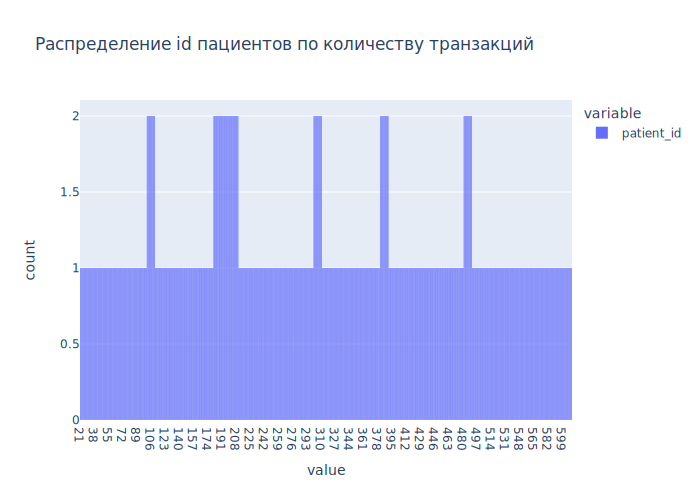

In [15]:
fig = px.histogram(parsed_data['patient_id'], title='Распределение id пациентов по количеству транзакций')
fig.show('svg')

Окей. Получаем такое распределение по частоте транзакций, при котором никто из пациентов не совершал более двух транзакций. И при этом, `id` пациентов, которые совершили 2 транзакции, сгруппированы, а не разбросаны случайным образом

Попробуем теперь распарсить дату. Может быть ошибка будет только в тех пациентах, у которых дата указана неправильно.

Сделаем это следующим образом: Создадим два списка для корректных и некорректных индексов на основе, удалось ли распознать дату. И два списка, в которые будем заносить информацию о транзакции (размер, дата) согласно корректности индексов

In [16]:
date_array = parsed_data['transaction_date']

In [17]:
split_date_array = []
for i in range(date_array.shape[0]):
    split_date_array.append(date_array[i].split('.'))

In [18]:
correct_indexes = [] 
incorrect_indexes = []
incorrect_date = []
parsed_dates = []
for i in range(len(split_date_array)):
    try:
        parsed_dates.append(datetime.datetime(day=int(split_date_array[i][0]),\
                                              month=int(split_date_array[i][1]), year=int(split_date_array[i][2])))
        correct_indexes.append(i)
    except:
        incorrect_date.append(split_date_array[i])
        incorrect_indexes.append(i)

In [19]:
correct_dates = pd.DataFrame({'correct_dates': parsed_dates, 'id': correct_indexes})
correct_dates.set_index(correct_dates['id'], inplace=True)
correct_dates = correct_dates.merge(parsed_data, left_on=correct_dates.index, right_on=parsed_data.index)
correct_dates.drop(['key_0', 'transaction_date'], axis=1, inplace=True)

In [20]:
correct_dates

,correct_dates,id,patient_id,transaction
0,2020-01-07,0,21,3468.72
1,2020-01-02,1,22,9264.84
2,2020-01-31,2,23,9593.12
3,2020-01-30,3,24,7798.25
4,2020-01-24,4,25,4425.30
...,...,...,...,...
603,2020-06-14,654,605,1651.85
604,2020-02-03,656,607,6597.90
605,2020-06-08,657,608,2526.00
606,2020-06-13,658,609,8097.32


Получаем 608/660 правильно распознанных дат.

Теперь рассчитаем суммарную статистику по месяцам, посмотрим разницу. Здесь и подгрузим наш достоверный отчет

In [21]:
correct_dates['month'] = correct_dates['correct_dates'].dt.month # выделяем месяц
correct_dates['transaction'] = correct_dates['transaction'].astype(float) # приводим транзакцию к типу float, чтобы суммировать
report_with_correct_dates = correct_dates.groupby('month').sum().drop('id', axis=1) # группируем по месяцам
true_report = data[['отчет', 'Unnamed: 6']][1:7].rename(columns={'отчет': 'Месяц', 'Unnamed: 6': 'Сумма'}) # загружаем достоверный отчет
true_report['Сумма'] = true_report['Сумма'].astype(float) # приводим итоговую сумму к типу float, чтобы суммировать
report_with_correct_dates['true_transaction'] = true_report['Сумма']
report_with_correct_dates['dif_transaction'] = report_with_correct_dates['true_transaction'] - report_with_correct_dates['transaction']

In [22]:
report_with_correct_dates

,transaction,true_transaction,dif_transaction
month,,,
1,345374.36,485487.84,140113.48
2,478693.70,570192.91,91499.21
3,544735.84,698723.40,153987.56
4,315449.50,444834.87,129385.37
5,508730.49,574488.89,65758.40
6,452372.75,579810.45,127437.70
7,75447.74,NaN,NaN
8,88548.74,NaN,NaN
9,100853.88,NaN,NaN


<a id='hyp1'></a>
### 4. Гипотеза №1

Получаем, что у нас в списке транзакицй есть все 12 месяцев. А в выгрузке настоящего отчета только 6.

Проверим гипотезу о том, **что сумма разниц транзакций между итоговым отчетом и транзакций с корректными датами будет равна сумме транзакций за 7-12 месяцы и сумме всех транзакций с некорректной датой**

In [23]:
total_dif = report_with_correct_dates['dif_transaction'][1:6].sum()

In [24]:
fals_trans = parsed_data.iloc[incorrect_indexes]
fals_trans['transaction'] = fals_trans['transaction'].astype(float)
incorrect_date_transactions_sum = fals_trans["transaction"].sum()
sum_total = report_with_correct_dates['transaction'][0:12].sum()

<ipython-input-24-0d4332bc9c18>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
sum_jul_to_dec = report_with_correct_dates['transaction'][7:12].sum()

In [26]:
print(f'Общая сумма транзакций с очевидно неверной датой {incorrect_date_transactions_sum}')
print(f'Общая сумма недостающих транзакций {total_dif}')
print(f'Общая сумма транзакций с неверной датой + за июль-декабрь {sum_jul_to_dec + incorrect_date_transactions_sum}')

Общая сумма транзакций с очевидно неверной датой 242968.58000000005
Общая сумма недостающих транзакций 568068.2399999998
Общая сумма транзакций с неверной датой + за июль-декабрь 632733.98


Ещё на всякий случай проверим, совпадает ли у нас рассчитаная сумма всех транзакций с данной выгрузкой. Так сказать, убедиться, что всё на месте, ничего не потерялось и ничего лишнего не затесалось

In [27]:
print(f'Рассчитанная сумма всех транзакций {sum_total + incorrect_date_transactions_sum}')
parsed_data['transaction'] = parsed_data['transaction'].astype(float)
print(f'Табличная сумма всех транзакций {parsed_data["transaction"].sum()}')

Рассчитанная сумма всех транзакций 3353538.3600000003
Табличная сумма всех транзакций 3353538.36


Отлично. Суммы сошлись до копейки (та тройка на конце рассчитаной суммы, это особенность работы эвм с дробными числами. Можно использовать тип данных `Decimal`, но здесь для анализа быстрее сделать так)

В итоге гипотезу придётся опровергнуть. Что мы имеем. Имеем то, что суммы не сошлись, а из этого можно сделать вывод, что ошибки в транзакциях есть и там, где дата распарсилась верно

<a id='hyp2'></a>
### 5. Гипотеза №2

Значит, нужно искать другой подход. Ещё раз внимательно посмотрев на данные и распределение количества транзакций, мне на ум пришла новая гипотеза. А что если просто попробовать взять отсечку по `k-ый` индекс и просто просуммировать, где `k` подбирается эмпирически. Ведь при более детальном изучении, видно, что большинство записей всё же упорядочены.

P.S. эта гипотеза оказалась верной, далее просто подбираем эмпирически необходимые границы месяцев и в итоговый `loss` для каждого пациента записываем **0**, если месяц транзакции на своём месте и **величину транзакции** иначе.

In [28]:
true_report

,Месяц,Сумма
1,январь,485487.84
2,февраль,570192.91
3,март,698723.40
4,апрель,444834.87
5,май,574488.89
6,июнь,579810.45


In [29]:
parsed_data['patient_id'] = parsed_data['patient_id'].astype(int)

In [30]:
january_part = parsed_data.query('patient_id >= 21 and patient_id <= 110')[0:90]
january_trans = january_part[0:90]['transaction'].astype(float).sum()
january_trans

485487.8399999999

In [31]:
print(january_part['transaction'].astype(float).sum())
january_part

485487.8399999999


,patient_id,transaction,transaction_date
0,21,3468.72,7.1.2020
1,22,9264.84,2.1.2020
2,23,9593.12,31.1.2020
3,24,7798.25,30.1.2020
4,25,4425.30,24.1.2020
...,...,...,...
85,106,7978.63,11.1.2020
86,107,3531.00,7.1.2020
87,108,3841.92,29.7.2020
88,109,3496.36,13.1.2020


In [32]:
feb_part = parsed_data.query('patient_id >= 101 and patient_id <= 210')
feb_part = feb_part.loc[90:199]
feb_part['transaction'].astype(float).sum()

570192.9099999999

In [33]:
feb_part

,patient_id,transaction,transaction_date
90,101,9680.07,15.2.2020
91,102,5794.58,23.2.2020
92,103,7920.62,11.2.2020
93,104,4438.63,14.2.2020
94,105,6265.20,16.2.2020
...,...,...,...
195,206,6236.51,2.2.2020
196,207,8263.58,28.9.2020
197,208,3133.79,8.8.2020
198,209,16.85,8.2.2020


In [34]:
march_part = parsed_data.query('patient_id >= 181 and patient_id <= 310')
march_part = march_part.loc[200:329]
march_part['transaction'].astype(float).sum()

698723.4

In [35]:
march_part

,patient_id,transaction,transaction_date
200,181,4011.67,6.10.2020
201,182,9902.16,7.3.2020
202,183,276.92,3.24.2020
203,184,3822.93,3.23.2020
204,185,2900.51,27.12.2020
...,...,...,...
325,306,8996.96,27.6.2020
326,307,133.82,25.3.2020
327,308,4636.45,3.3.2020
328,309,1751.84,21.3.2020


In [36]:
april_part = parsed_data.query('patient_id >= 301 and patient_id <= 410')
april_part = april_part.loc[330:419]
april_part['transaction'].astype(float).sum()

444834.87

In [37]:
may_part = parsed_data.query('patient_id >= 380 and patient_id <=  510')
may_part = may_part.loc[420:529]
may_part['transaction'].astype(float).sum()

574488.89

In [38]:
june_part = parsed_data.query('patient_id >= 480 and patient_id <= 710')
june_part = june_part.loc[530:710]
june_part['transaction'].astype(float).sum()

579810.4500000001

In [39]:
true_report

,Месяц,Сумма
1,январь,485487.84
2,февраль,570192.91
3,март,698723.40
4,апрель,444834.87
5,май,574488.89
6,июнь,579810.45


In [40]:
jan = january_part.copy()
feb = feb_part.copy()
mar = march_part.copy()
apr = april_part.copy()
may = may_part.copy()
jun = june_part.copy()

In [41]:
def calc_loss(data, current_month):
    tmp_dict = {'1': 0, '2': 90, '3': 200, '4': 330, '5': 420, '6': 530}
    step = tmp_dict[current_month]
    loss = []
    for i in range(step, step + data.shape[0]):
        if data['transaction_date'][i][-6] == current_month:
            loss.append(0)
        else:
            loss.append(data['transaction'][i])
    return loss

In [42]:
jan['loss'] = calc_loss(jan, '1')
feb['loss'] = calc_loss(feb, '2')
mar['loss'] = calc_loss(mar, '3')
apr['loss'] = calc_loss(apr, '4')
may['loss'] = calc_loss(may, '5')
jun['loss'] = calc_loss(jun, '6')

In [43]:
jan['report_month'] = 1
feb['report_month'] = 2
mar['report_month'] = 3
apr['report_month'] = 4
may['report_month'] = 5
jun['report_month'] = 6

<a id='imp'></a>
# Важное замечание

Отдельно проверим и удалим несоответствующие дате значения (например 30 февраля или 31 апреля и тому подобное).

**И в найденных несуществующих датах укажем loss = transaction**

In [114]:
answer = pd.concat([jan, feb, mar, apr, may, jun], axis=0)

In [117]:
answer.to_csv('answer.csv') # здесь запишем в файл, чтобы быстро руками проверить все некорректные даты (так быстрее)

Пробежимся глазами, где же у нас некорректная дата, но при этом во втором столбце стоит значение <= 12 (т.к. это месяц).

In [121]:
#incorrect_date

Видим, что это 30(2 значения) и 31 февраля, 31 апреля, 31 июня (2 значения). Поправим их руками, так будет быстрее.

Кстати, 2020ый год был високосным, поэтому с 29 февраля всё ок

In [128]:
answers = pd.read_csv('answers_cleaned.csv')

Теперь приведём к требуемому формату и выгрузим

In [129]:
answers = answers[['patient_id', 'report_month', 'loss']]
answers.to_csv('answers.csv')